In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Linear Regression and Multiple Linear Regression

### a. Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

####                   How could Highway-mpg help us predict car price?

In [120]:
X = df[['highway-mpg', 'normalized-losses']]

Z = df [['highway-mpg']]
Y = df['price']


lm.fit(Z,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
Yhat = lm.predict(Z)

In [122]:
Yhat[0:5]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [123]:
# what is the regression like? 

print(lm.intercept_)  # intercept 
print('\n', lm.coef_) # slope

print('\nRegression line to predict price based on ''highway-mpg'' is:', 'Y = {}X + {}'.format(round(lm.coef_[0]), round(lm.intercept_) ))

38423.305858157386

 [-821.73337832]

Regression line to predict price based on highway-mpg is: Y = -822.0X + 38423.0


(0, 48291.372500927704)

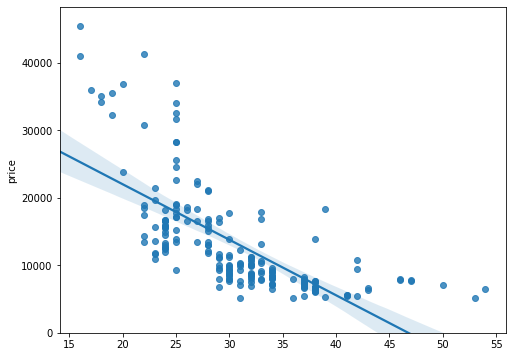

In [124]:
# Evaluation by Visualization

# How Highway-mpg alone affects prices

import seaborn as sns

width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(Z, Y, data=df)
plt.ylim(0,)

In [126]:
# what is the regression like when we predict prices based on highway-mpg and normalized-losses? 

lm.fit(X,Y)
Yhat1 = lm.predict(X)

print(lm.intercept_)  # intercept 
print('\n', lm.coef_) # slope

print('\nRegression line to predict price based on ''highway-mpg'' (X1) and ''normalized-losses'' (X2) is:', 
      'Y = {}X1 + {}X2 + {}'.format(round(lm.coef_[0]), round(lm.coef_[1]), round(lm.intercept_) ))


38201.31327245728

 [-820.45434016    1.49789586]

Regression line to predict price based on highway-mpg (X1) and normalized-losses (X2) is: Y = -820.0X1 + 1.0X2 + 38201.0


## Residual Plot

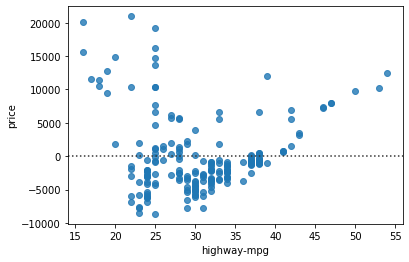

In [127]:
import sklearn

sns.residplot(df['highway-mpg'],df['price'])

# By plotting the residual graph, we see that the residual values are not randomly spread out around the X axis. 

# Therefore, a linear prediction might not be the best fit here.

## Multiple Linear Regression

### 1) Plot the Distribution plot 

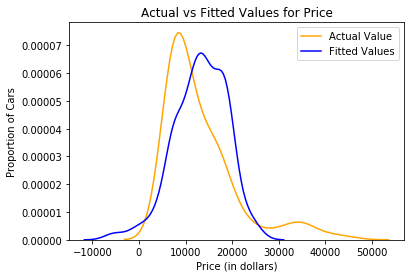

In [128]:
ax1 = sns.distplot(df['price'], hist=False, color="orange", label="Actual Value")
ax2 = sns.distplot(Yhat, hist=False, color="blue", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#### We can see that the model fits the actual data pretty well. However, there is still room for improvement.

## Polynomial Regression and Pipelines

In [129]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length\n')
    ax = plt.gca()
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [130]:
x = df['highway-mpg']
y = df['price']

import numpy as np

In [131]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


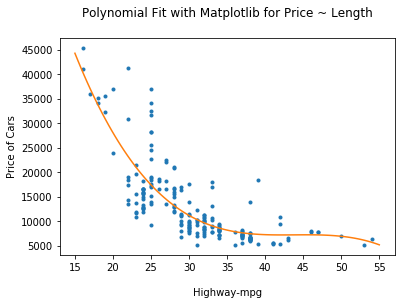

In [132]:
# Now let's plot the function

PlotPolly (p, df['highway-mpg'], df['price'], '\nHighway-mpg')

### R-Squared and MSE

In [139]:
# Get the R squared

lm.fit(Z,Y)
r2 = lm.score(Z,Y)

print('The R-square is: ', r2) # R^2 means the model can predict about 49% of the data 

The R-square is:  0.4965911884339175


In [140]:
# Get the MSE

from sklearn.metrics import mean_squared_error

mean_squared_error(Y, Yhat)

31635042.944639895

#### Let's try model 2 (polynomial regression) and find the $R^2$ and the MSE 

In [141]:
W = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

# Get the R^2

lm.fit(W,Y)
R2 = lm.score(W,Y)

print('The R-square is: ', R2)

The R-square is:  0.8093562806577457


In [142]:
# Get the MSE

from sklearn.metrics import mean_squared_error

mean_squared_error(Y, Yhat)

31635042.944639895

In [145]:
lm.intercept_, lm.coef_

(-15806.624626329227,
 array([53.49574423,  4.70770099, 81.53026382, 36.05748882]))

#### We see that here with the second model, the $R^2$ is 0.8, closer to 1. 

#### Therefore, in this case, we might want to use the model in the form: 

### $\hat{Y}$ = $\beta{X1}$ + $\alpha{X2}$ + $\gamma{X3}$ + ... 
